# data preprocessing

In [1]:
import pandas as pd 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyecharts.charts import *
from pyecharts import options as opts 

In [2]:
data = pd.read_csv('/Users/apple/covid_19_data.csv')
#pd.set_option('display.max_rows', None)#output set

In [3]:
#simplize names of columns
data.rename(columns={'Country/Region':'Country'},inplace=True)
data.rename(columns={'ObservationDate':'Date'},inplace=True)

In [ ]:
data.columns # to see all the features

In [4]:
data.Country = data.Country.replace('Mainland China','China')
data.Country = data.Country.replace('Hong Kong','China')
data.Country = data.Country.replace('Macau','China')
data.Country = data.Country.replace('Taiwan','China')         #change country to china
data.Country = data.Country.replace('US','United States')

In [ ]:
data.head()

In [ ]:
data.tail()

# 总体数据分析

# map of China

In [5]:
china_data = data[data.Country == 'China']
diff_china = china_data['Province/State'].unique()
china = pd.DataFrame([],index=data.index,columns=data.columns)
j = 0
for i in range(len(data)):
    if data.loc[i]['Province/State'] in list(diff_china) :
        china.iloc[j] = data.iloc[i]
        j+=1
        
P = china.groupby('Province/State').apply(lambda t: t[t['Last Update']==t['Last Update'].max()])
P = P.groupby('Province/State').apply(lambda x:x.iloc[0])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: 'Province/State' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  # This is added back by InteractiveShellApp.init_path()


In [6]:
map = Map()
area = ['安徽','北京','重庆','福建','甘肃','广东','广西','贵州','海南','河北','黑龙江','河南','香港','湖北','湖南','内蒙古','江苏'
       ,'江西','吉林','辽宁','澳门','宁夏','青海','陕西','山东','上海','山西','四川','台湾','天津','西藏','新疆','云南','浙江']
#value = list(china_data.Confirmed)
value = list(P.Confirmed)
map.add('Concerned',[z for z in zip(area,value)] , "china")
map.set_series_opts(label_opts=opts.LabelOpts(is_show=True))
map.set_global_opts(title_opts=opts.TitleOpts(title='Illness Map'))
piece_value =[{'min':1500,'color':'#D94E5D'},
              {'min':1000,'max':1500,'color':'#E28B5F'},
              {'min':500,'max':1000,'color':'#EAC763'},
              {'min':200,'max':500,'color':'#9DB58F'},
              {'max':200,'color':'#50A3BA'}]
map.set_global_opts(visualmap_opts=opts.VisualMapOpts(is_piecewise = True,pieces=piece_value)) 
map.render_notebook()

# Chinese trend analyse

In [32]:
China_confirmed = china_data.groupby('Date').Confirmed.apply(lambda p:sum(p))
China_recovered = china_data.groupby('Date').Recovered.apply(lambda p:sum(p))
China_deaths = china_data.groupby('Date').Deaths.apply(lambda p:sum(p))

In [ ]:
line =Line()
attr = [i[:5] for i in hubei_data.Date.unique()]
v1 = list(hubei_data.Confirmed)
v2 = list(hubei_data.Recovered)
line.add_xaxis(attr)
line.add_yaxis('Confirmed',v1,areastyle_opts=opts.AreaStyleOpts(opacity=0.5))
line.add_yaxis('Recovered',v2,areastyle_opts=opts.AreaStyleOpts(opacity=0.5))
line.set_global_opts(title_opts=opts.TitleOpts(title='Hubei disease'))
line.render_notebook()

### line graphs

In [42]:
attr = [i[:5] for i in china_data.Date.unique()]
line = (
    Line(init_opts=opts.InitOpts(width="1000px", height="600px"))
    .add_xaxis(attr)
    .add_yaxis('Confirmed',China_confirmed,areastyle_opts=opts.AreaStyleOpts(opacity=0.5))
    .add_yaxis('Recovered',China_recovered,areastyle_opts=opts.AreaStyleOpts(opacity=0.5))
    .add_yaxis('Deaths',China_deaths,areastyle_opts=opts.AreaStyleOpts(opacity=1))
    .set_global_opts(title_opts=opts.TitleOpts(title='China disease'))
)
line.render_notebook()

In [58]:
x = [0,]
for i in range(1,China_confirmed.size):
    x.append(China_confirmed[i]-China_confirmed[i-1]) 
y = [0,]
for i in range(1,China_recovered.size):
    y.append(China_recovered[i]-China_recovered[i-1]) 
attr = [i[:5] for i in china_data.Date.unique()]
line = (
    Line(init_opts=opts.InitOpts(width="1000px", height="600px"))
    .add_xaxis(attr)
    .add_yaxis('Confirmed increase',x,areastyle_opts=opts.AreaStyleOpts(opacity=0.5))
    .add_yaxis('Recovered increase',y,areastyle_opts=opts.AreaStyleOpts(opacity=0.5))
    .set_global_opts(title_opts=opts.TitleOpts(title='China disease'))
)
line.render_notebook()

In [8]:
china_describe = pd.DataFrame({"Confirmed":China_confirmed,"Recovered":China_recovered,"Deaths":China_deaths}).reset_index()

In [9]:
def bar_plot(column_name):
    plt.figure(figsize=(10,15))
    plt.title("total {} in China".format(column_name))
    plt.xticks(rotation=90)
    plt.xlabel('Date', fontsize=18)
    plot_1=sns.barplot(x="Date",y=column_name,data=china_describe)
    plot_1

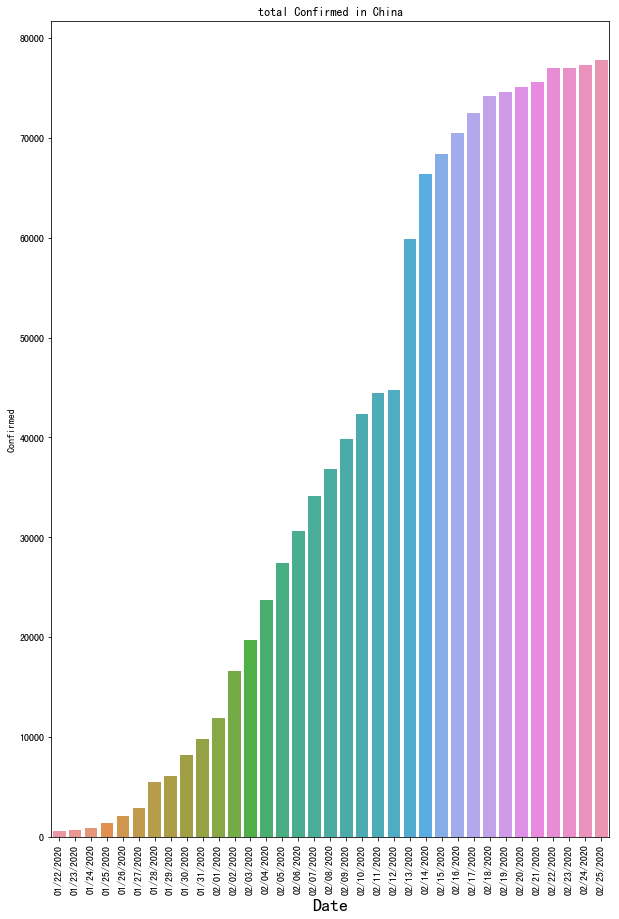

In [61]:
bar_plot('Confirmed')

In [ ]:
#bar_plot('Recovered')

In [ ]:
#bar_plot('Deaths')

In [10]:
melt_data = pd.melt(china_describe,id_vars=['Date'])

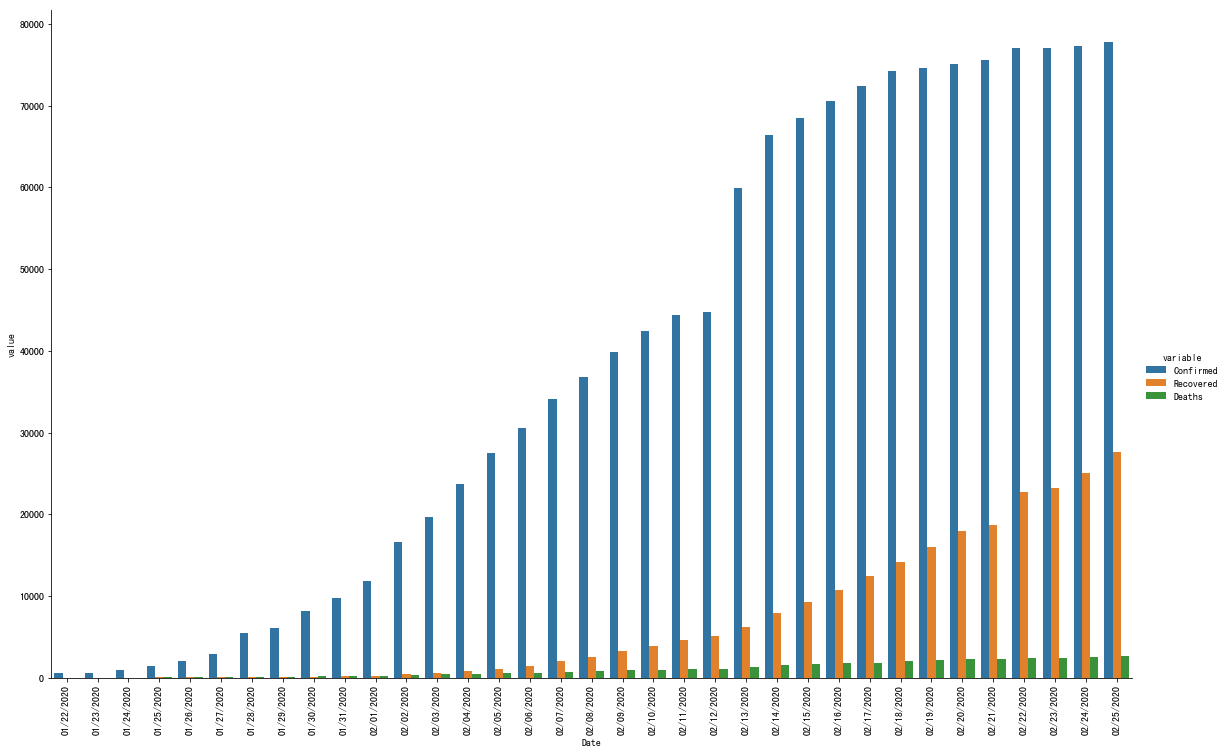

In [11]:
hm = sns.catplot(x='Date', y='value', hue='variable',data=melt_data, kind='bar',height=10,aspect =1.6,legend=True)
hm.set_xticklabels( rotation=90)

In [12]:
from pyecharts.charts import Pie
china_pie = (
    Pie()
    .add("",[('Confirmed',China_confirmed[-1]),('Recovered',China_recovered[-1]),('Deaths',China_deaths[-1])])
    .set_global_opts(title_opts=opts.TitleOpts(title="Latest data in Pie of China"))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
)
china_pie.render_notebook()

# "Sunburst" graph analyse

In [13]:
Latest_data = data[data.Country!='China'].loc[:][data.Date==data.Date.unique()[-1]]
Latest_data['Province/State'] = Latest_data['Province/State'].replace(np.nan,Latest_data.Country)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [14]:
K = Latest_data.groupby(['Country','Province/State']).sum()

In [15]:
sun_data = [
    opts.SunburstItem(
        name = i[:5], 
        children=[
            opts.SunburstItem(name = j.name[:3],
                              children=[
                                  opts.SunburstItem(name='Confirmed',value=j['Confirmed']),
                                  opts.SunburstItem(name='Recovered',value=j['Recovered']),
                                  opts.SunburstItem(name='Deaths',value=j['Deaths'])
                              ]) 
            
            for k,j in K.loc[i].iterrows()
        ]
    )
    for i in list(Latest_data.Country.unique())
]

In [16]:
c = (
    Sunburst(init_opts=opts.InitOpts(width="2000px", height="1200px"))
    .add(series_name="",data_pair=sun_data,radius=[0,"%95"],
    levels=[
                {},
                {
                    "r0": "15%",
                    "r": "35%",
                    "itemStyle": {"borderWidth": 2},
                    "label": {"rotate": "tangential"},
                },
                {"r0": "35%", "r": "70%", "label": {"align": "right"}},
                {
                    "r0": "70%",
                    "r": "72%",
                    "label": {"position": "outside", "padding": 3, "silent": False},
                    "itemStyle": {"borderWidth": 3},
                },
            ])
    .set_global_opts(title_opts=opts.TitleOpts(title="Sunburst"))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}"))
)
c.render_notebook()

# World map

In [17]:
df_countries = data.groupby(['Country', 'Date']).sum().reset_index().sort_values('Date', ascending=True)

In [18]:
date_category = df_countries.groupby(['Date','Country']).sum().reset_index('Country')
date_time = date_category.index.unique()
#data

In [19]:
multi_map = []
for i in list(date_time):
    multi_map.append(date_category.loc[i])

In [20]:
from pyecharts.charts import Timeline
tl = Timeline()
piece_value =[{'min':1000,'max':80000,'color':'#D94E5D'},
              {'min':100,'max':1000,'color':'#E28B5F'},
              {'min':50,'max':100,'color':'#EAC763'},
              {'min':10,'max':50,'color':'#9DB58F'},
              {'min':1,'max':10,'color':'#50A3BA'}]
for i in range(len(multi_map)):
    Country = list(multi_map[i].Country)
    C_confirmed = list(multi_map[i].Confirmed)
    mul_map = (
            Map()
            .add('确诊人数',[list(z) for z in zip(Country,C_confirmed)],'world')
            .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
            .set_global_opts(title_opts=opts.TitleOpts(title='疫情地图'))
            .set_global_opts(visualmap_opts=opts.VisualMapOpts(is_piecewise = True,pieces=piece_value)) 
            )
    tl.add(mul_map,multi_map[i].index[0][:5])
tl.add_schema(play_interval=400)
tl.render_notebook()

In [ ]:
data[data.Country=='Others']#珍珠号患者

# Word Cloud 

In [21]:
from pyecharts.charts import WordCloud
words = [(j.Country,0.8*j.Confirmed-0.5*j.Recovered+j.Deaths) for i,j in multi_map[-1].iterrows() ]

word_cloud = (
    WordCloud()
    .add("",words,word_size_range=[20,100])
    .set_global_opts(title_opts=opts.TitleOpts(title="WordCloud of Seriousness"))
)
word_cloud.render_notebook()

# Hubei analyse

In [22]:
hubei_data = data[data['Province/State']=='Hubei']

In [24]:
from pyecharts.charts import Line
#configure(output_image=True)
line =Line()
attr = [i[:5] for i in hubei_data.Date.unique()]
v1 = list(hubei_data.Confirmed)
v2 = list(hubei_data.Recovered)
line.add_xaxis(attr)
line.add_yaxis('Confirmed',v1,areastyle_opts=opts.AreaStyleOpts(opacity=0.5))
line.add_yaxis('Recovered',v2,areastyle_opts=opts.AreaStyleOpts(opacity=0.5))
line.set_global_opts(title_opts=opts.TitleOpts(title='Hubei disease'))
line.render_notebook()

In [25]:
line2 = Line()
vline2 = [0,]
for i in range(1,len(v1)):
    vline2.append(round((v1[i]-v1[i-1])/v1[i-1],2))
line2.add_xaxis(attr)
line2.add_yaxis('Confirmed increase rate',vline2,markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_="average")]))
line2.set_global_opts(title_opts=opts.TitleOpts(title='Confirmed rate'))
line2.render_notebook()

In [27]:
line3 = Line()
v1_line3 = [0,]
v2_line3 = [0,]
for i in range(1,len(v1)):
    v1_line3.append(v1[i]-v1[i-1])
    v2_line3.append(v2[i]-v2[i-1])

line3.add_xaxis(attr)
line3.add_yaxis('New Confirmed',v1_line3)
line3.add_yaxis('New Recovered',v2_line3)
line3.set_global_opts(title_opts=opts.TitleOpts(title='New Confirmed Vs New Recovered'))
line3.render_notebook()

In [28]:
line4 = Line()

line4.add_xaxis(attr)
line4.add_yaxis('',[i-j for i,j in zip(v1_line3,v2_line3)])
line4.set_global_opts(title_opts=opts.TitleOpts(title='Confirmed - Recovered'))
line4.render_notebook()